In [6]:
#Dựa trên điểm thi đánh giá năng lực, 
# Hãy phán đoán xem sinh viên có định hướng nghề nghiệp
# hay chưa được định hướng nghề nghiệp

# Input -> Model -> Output (Giá trị rời rạc)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('dulieuxettuyendaihoc.csv', header=0, delimiter=',', encoding='UTF-8')

df

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [7]:
df = df[['NGONNGU', 'TOANLOGICPHANTICH', 'DINHHUONGNGHENGHIEP', 'GIAIQUYETVANDE']]

df

,NGONNGU,TOANLOGICPHANTICH,DINHHUONGNGHENGHIEP,GIAIQUYETVANDE
0,3.25,3.25,No,4.50
1,6.00,4.00,Yes,3.50
2,5.00,6.75,No,4.00
3,4.25,4.25,No,5.25
4,4.25,4.50,No,5.00
...,...,...,...,...
95,5.25,1.50,Yes,6.25
96,5.25,3.75,No,4.75
97,7.00,8.00,Yes,4.00
98,5.00,3.50,No,5.50


In [8]:
df.rename(columns={'NGONNGU': 'NN', 'TOANLOGICPHANTICH':'LG', 
                   'GIAIQUYETVANDE':'UX', 
                   'DINHHUONGNGHENGHIEP':'DH'}, inplace=True)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_10964\3326457446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'NGONNGU': 'NN', 'TOANLOGICPHANTICH':'LG',


,NN,LG,DH,UX
0,3.25,3.25,No,4.50
1,6.00,4.00,Yes,3.50
2,5.00,6.75,No,4.00
3,4.25,4.25,No,5.25
4,4.25,4.50,No,5.00
...,...,...,...,...
95,5.25,1.50,Yes,6.25
96,5.25,3.75,No,4.75
97,7.00,8.00,Yes,4.00
98,5.00,3.50,No,5.50


In [ ]:
# Số hoá cột DH

dinhhuong = pd.get_dummies(df['DH'], drop_first=True)
# drop_first: Bỏ cột No
df.drop('DH', axis=1, inplace=True)
df = pd.concat([df, dinhhuong], axis=1)

df

# Đây là code chi tiết
# dinhhuong = pd.get_dummies(df['DH'])
# dinhhuong.drop('No', axis=1, inplace=True)
# dinhhuong

# df.drop('DH', axis=1, inplace=True)
# df = pd.concat([df, dinhhuong], axis=1)

In [9]:
# Đây là code chi tiết
dinhhuong = pd.get_dummies(df['DH'])
dinhhuong.drop('No', axis=1, inplace=True)
dinhhuong


,Yes
0,False
1,True
2,False
3,False
4,False
...,...
95,True
96,False
97,True
98,False


In [10]:
df.drop('DH', axis=1, inplace=True)
df = pd.concat([df, dinhhuong], axis=1)

df

C:\Users\Admin\AppData\Local\Temp\ipykernel_10964\1507995607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('DH', axis=1, inplace=True)


,NN,LG,UX,Yes
0,3.25,3.25,4.50,False
1,6.00,4.00,3.50,True
2,5.00,6.75,4.00,False
3,4.25,4.25,5.25,False
4,4.25,4.50,5.00,False
...,...,...,...,...
95,5.25,1.50,6.25,True
96,5.25,3.75,4.75,False
97,7.00,8.00,4.00,True
98,5.00,3.50,5.50,False


In [11]:
X = df[['NN', 'LG', 'UX']].values
y = df[['Yes']].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train.flatten())

LogisticRegression()

In [14]:
# z = -1.29 + 0.319*NN + -0043*LG + 0.0289*UX
model.coef_
# Hệ số góc

array([[ 0.31978112, -0.04309514,  0.02891314]])

In [15]:
# Hệ số tự do

model.intercept_

array([-1.29714816])

In [ ]:
# Giả sử với điểm NN là 3.75, LG là 4.5, UX là 4.25 thì SV có định hướng nghề nghiệp không
# z = -1.29 + 0.319*NN + -0043*LG + 0.0289*UX
# z' = 1/(1+e^-2)
# Ngưỡng

# z=-1.29714816 + 0.31978112*3.75 + -0.04309514*4.5 + 0.02891314*4.25=-0.175
# z1 = 0.4516
# z1<0.5 -> Sinh viên không có định hướng NN

# Giả sử với điểm NN là 4.75, LG là 2.0, UX là 5.5 thì SV có định hướng nghề nghiệp không
# z = -1.29 + 0.319*NN + -0043*LG + 0.0289*UX
# z' = 1/(1+e^-2)
# Ngưỡng

# z=-1.29714816 + 0.31978112*4.75 + -0.04309514*2.0 + 0.02891314*5.5
# z=0.29464414999999977
# z1 = 0.4516
# z1=Yes
# z1>0.5 -> Sinh viên có định hướng NN

In [16]:
X_test

array([[3.75, 4.5 , 4.25],
       [4.75, 2.  , 5.5 ],
       [3.5 , 4.75, 3.5 ],
       [5.75, 3.5 , 4.25],
       [4.75, 6.5 , 8.  ],
       [2.75, 3.75, 5.  ],
       [2.25, 3.5 , 5.  ],
       [3.75, 4.  , 3.5 ],
       [2.  , 5.25, 3.5 ],
       [4.  , 4.75, 5.5 ],
       [5.  , 4.  , 6.75],
       [2.5 , 3.5 , 6.5 ],
       [5.25, 4.5 , 4.75],
       [4.25, 2.75, 3.25],
       [5.  , 3.5 , 5.5 ],
       [1.5 , 4.5 , 5.5 ],
       [4.75, 4.75, 4.5 ],
       [6.5 , 4.5 , 8.  ],
       [2.25, 4.  , 4.25],
       [2.5 , 2.75, 5.5 ]])

In [17]:

# Ngưỡng mặc định Py là 0.5
y_pred_test = model.predict(X_test)
y_pred_test

array([False,  True, False,  True,  True, False, False, False, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False, False])

In [18]:
# Xem giá trị của z' trước khi đi qua ngưỡng

print(model.predict_proba(X_test))

# Target chọn cột Yes
# Xác xuất của No cột 1 và Yes cột 2
# Lớn hơn 0.5 là 1, nhỏ hơn 0.5 là 0
# z' là cột thứ 2

[[0.54215376 0.45784624]
 [0.42686728 0.57313272]
 [0.56989436 0.43010564]
 [0.37434035 0.62565965]
 [0.45685782 0.54314218]
 [0.60701717 0.39298283]
 [0.64196612 0.35803388]
 [0.54218784 0.45781216]
 [0.68624869 0.31375131]
 [0.51592045 0.48407955]
 [0.41956957 0.58043043]
 [0.61315482 0.38684518]
 [0.41943042 0.58056958]
 [0.49065667 0.50934333]
 [0.42312774 0.57687226]
 [0.70106665 0.29893335]
 [0.46326149 0.53673851]
 [0.30601715 0.69398285]
 [0.65184076 0.34815924]
 [0.6123461  0.3876539 ]]


In [19]:
# Thiết lập lại ngưỡng 0.65
# [:,1] lấy cột 1 = Cột Yes
y_pred_test_new_threshold = (model.predict_proba(X_test)[:,1]>=0.65).astype(int)

y_pred_test_new_threshold

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [20]:
y_pred_test_new_threshold = (model.predict_proba(X_test)[:,1]>=0.35).astype(int)

y_pred_test_new_threshold

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [21]:
# Ngưỡng 0.5
result = pd.DataFrame({'Actual':y_test.flatten(), 'Predict': y_pred_test})

result

# Accuracy = Số mẫu đoán đúng/Tỏng số mẫu

,Actual,Predict
0,True,False
1,False,True
2,True,False
3,True,True
4,False,True
5,False,False
6,False,False
7,True,False
8,False,False
9,True,False


In [22]:
# Độ đo Accuracy
from sklearn.metrics import accuracy_score

accuracy_score (y_test, y_pred_test)

# Kết quả dự báo của mô hình có độ chính xác là 35%

0.35

In [23]:
# TP (Actual=1. Predict=1)=2  
# FP (Actual=0, Predict=1)=7  X
# FN (Actual=1, Predict=0)=6  X
# TN (Actual=0, Predict=0)=5

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

cf_matrix

# Từ trái qua phải TN, FP, FN, TP

array([[5, 7],
       [6, 2]], dtype=int64)

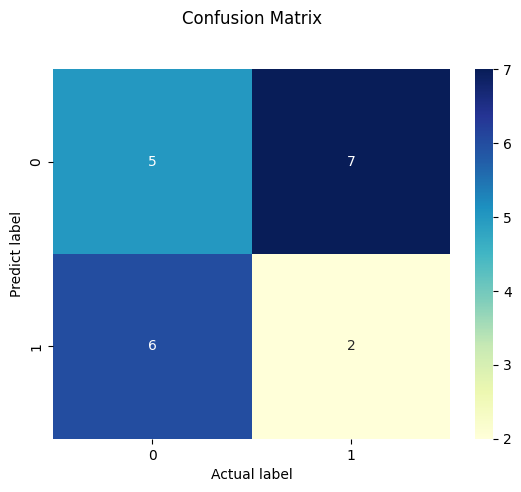

In [24]:
sns.heatmap(pd.DataFrame(cf_matrix),
            annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predict label')
plt.show()

In [25]:
# Các độ đo đánh giá mô hình phân lớp
# N là số lượng mẫu = TP+FP+FN+TN
# accuracy = (TP+TN)/(TP+FP+FN+TN)
# Predict = TP/(TP+FP)
# Recall = TP/(TP+FN)
# F1-score = 2*Precision*Recall/(Precision+Recall)

In [26]:
from sklearn.metrics import classification_report
target_names = ['Not oriented', 'Oriented']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

Not oriented       0.45      0.42      0.43        12
    Oriented       0.22      0.25      0.24         8

    accuracy                           0.35        20
   macro avg       0.34      0.33      0.34        20
weighted avg       0.36      0.35      0.35        20



In [ ]:
# Tìm hiểu đồ thị AUC và ROC

In [27]:
"""Lưu mô hình"""
import pickle
pickle.dump(model, open('model_logistic_regression.sav', 'wb'))

In [ ]:
import pickle

load_model = pickle.load(open('model_logistic_regression.sav', 'rb'))

vNN = float(input('Điểm ngôn ngữ: '))
vLG = float(input('Điểm logic: '))
vUX = float(input('Điểm ứng xử: '))

y_pred = load_model.predict([[vNN, vLG, vUX]])
print('Dự báo định hướng: '+str(y_pred[0]))